In [1]:
# import depenedencies
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# load data
ohtani = pd.read_csv("660271_data.csv")

In [3]:
# preview data
ohtani.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,CH,2022-07-13,82.6,-2.12,5.39,"Ohtani, Shohei",660271,664299,walk,blocked_ball,...,1,1,3,3,1,Infield shift,Standard,307.0,0.013,0.057
1,CH,2022-07-13,83.9,-2.05,5.51,"Ohtani, Shohei",660271,664299,NaN,ball,...,1,1,3,3,1,Infield shift,Standard,217.0,0.000,0.086
2,CH,2022-07-13,85.1,-2.00,5.47,"Ohtani, Shohei",660271,664299,NaN,ball,...,1,1,3,3,1,Infield shift,Standard,232.0,0.000,0.053
3,CH,2022-07-13,85.2,-1.98,5.36,"Ohtani, Shohei",660271,664299,NaN,blocked_ball,...,1,1,3,3,1,Infield shift,Standard,249.0,0.000,0.038
4,FF,2022-07-13,95.5,-1.73,5.43,"Ohtani, Shohei",660271,664299,triple,hit_into_play,...,0,0,3,3,0,Infield shift,Standard,209.0,0.170,2.051


In [4]:
# filter for 2021 season
ohtani21 = ohtani[pd.to_datetime(ohtani.game_date).dt.year==2021]

Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


In [5]:
# Summarize Ohtani's batted events in 2021
ohtani21["events"].value_counts()

field_out                    190
strikeout                    188
walk                          76
single                        58
home_run                      46
double                        26
triple                         8
grounded_into_double_play      7
field_error                    6
hit_by_pitch                   4
force_out                      4
fielders_choice                3
sac_fly                        2
pickoff_3b                     1
strikeout_double_play          1
Name: events, dtype: int64

In [6]:
# filter for just Ohtani's homeruns in 2021
ohtani21_hr = ohtani21[ohtani21.events=="home_run"]

In [7]:
# how fast were the pitches that Ohtani hit home runs off of? How fast were they on average?
ohtani21_hr.release_speed.mean()

88.69565217391305

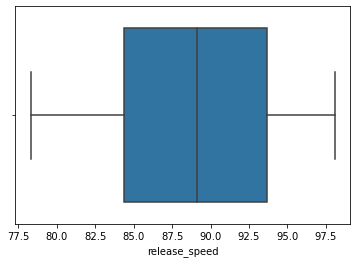

In [8]:
# means can fail to tell the whole picture, so let's see the box plot
sns.boxplot(x="release_speed", data=ohtani21_hr)
plt.show()

In [9]:
# how do these pitches compare to the pitches he struck out on?
ohtani21_so = ohtani21[ohtani21.events == "strikeout"]
ohtani21_so.release_speed.mean()

88.1526595744681

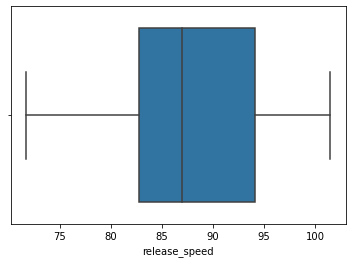

In [10]:
sns.boxplot(x="release_speed", data=ohtani21_so)
plt.show()

In [11]:
# how does it look when we look at pitch type?
pt_hr = ohtani21_hr.pitch_type.value_counts().sort_index(ascending=True)
pt_hr

CH     7
CU     1
FC     4
FF    12
FS     1
KC     1
SI     7
SL    13
Name: pitch_type, dtype: int64

In [12]:
pt_so = ohtani21_so.pitch_type.value_counts().sort_index(ascending=True)
pt_so

CH    28
CU    23
FC     7
FF    64
FS     5
KC     8
SI    13
SL    40
Name: pitch_type, dtype: int64

In [13]:
# which pitch types against Ohtani were more likely to produce home runs than strike outs?
hr_vs_so = pt_hr/pt_so
hr_vs_so.sort_values(ascending=False)

FC    0.571429
SI    0.538462
SL    0.325000
CH    0.250000
FS    0.200000
FF    0.187500
KC    0.125000
CU    0.043478
Name: pitch_type, dtype: float64

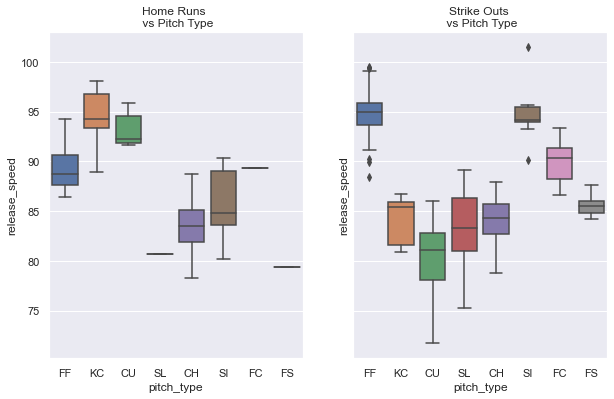

In [58]:
# compare the pitches that Ohtani hit home runs off of and struck out against by pitch type
## also compare by speed

fig, axs = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.set(rc={"figure.figsize":(6, 6)})
sns.boxplot(y="release_speed", x="pitch_type", data=ohtani21_hr, ax=axs[0]).set_title("Home Runs \n vs Pitch Type")
sns.boxplot(y="release_speed", x="pitch_type", data=ohtani21_so, ax=axs[1]).set_title("Strike Outs \n vs Pitch Type")
plt.show()

## Let's expand the scope a bit
### While Ohtani was among the top sluggers in 2021, homeruns still only represented a small portion of all his plate appearances. What made Ohtani formidable as a batter wasn't just that he hit a lot of homeruns, but that he hit hard. In fact, his slugging average of .592 was the fourth highest in all of MLB in 2021. In other words, what made him formidable was the he hit for extra bases a lot.
### So let's look all at extra base hits (doubles, triples, and home runs), not just home runs.

In [17]:
# filter data for extra base hits
ohtani21_eb = ohtani21[(ohtani21.events=="home_run") | (ohtani21.events=="double") | (ohtani21.events=="triple")]

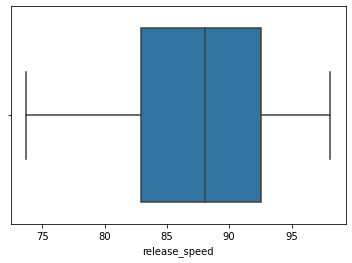

In [18]:
# how fast were the pitches that Ohtani hit extra bases for?
sns.boxplot(x="release_speed", data=ohtani21_eb)
plt.show()

### It appears that Ohtani hit for extra bases typically on balls in the high 80 mph range. Let's compare to his homeruns. Is this the pattern for extra base hits in general, or did homeruns in particular seem to be different?

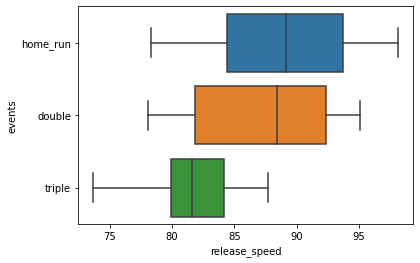

In [19]:
sns.boxplot(x="release_speed", y="events", data=ohtani21_eb)
plt.show()

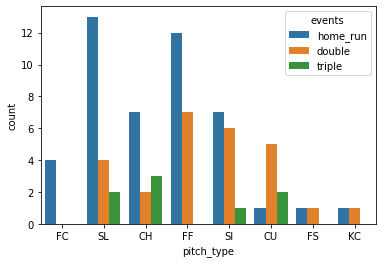

In [20]:
sns.countplot(x="pitch_type", hue="events", data=ohtani21_eb)
plt.show()

In [21]:
ohtani21_eb.groupby("events")["pitch_type"].value_counts(normalize=True)

events    pitch_type
double    FF            0.269231
          SI            0.230769
          CU            0.192308
          SL            0.153846
          CH            0.076923
          FS            0.038462
          KC            0.038462
home_run  SL            0.282609
          FF            0.260870
          CH            0.152174
          SI            0.152174
          FC            0.086957
          CU            0.021739
          FS            0.021739
          KC            0.021739
triple    CH            0.375000
          CU            0.250000
          SL            0.250000
          SI            0.125000
Name: pitch_type, dtype: float64

In [22]:
# filter data for hits
ohtani21_hits = ohtani21[(ohtani21.events=="single") | (ohtani21.events=="double") | (ohtani21.events=="triple") | (ohtani21.events=="home_run")]

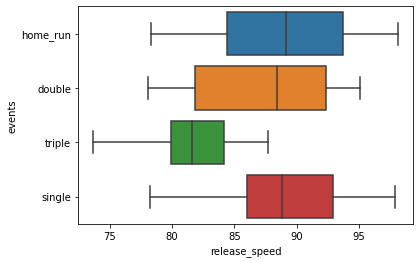

In [23]:
sns.boxplot(x="release_speed", y="events", data=ohtani21_hits)
plt.show()

## Pitch Location

In [24]:
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3

In [25]:
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        return 1

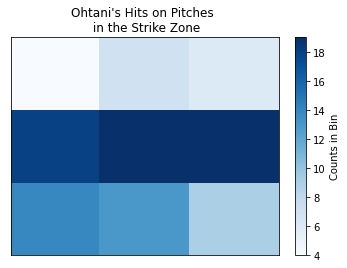

In [26]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
ohtani21_hits_zones = ohtani21_hits.copy().loc[ohtani21_hits.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Ohtani's hits
ohtani21_hits_zones['zone_x'] = ohtani21_hits_zones.apply(assign_x_coord, axis=1)
ohtani21_hits_zones['zone_y'] = ohtani21_hits_zones.apply(assign_y_coord, axis=1)

# Plot Ohtani's hit zone as a 2D histogram with a colorbar
plt.hist2d(x=ohtani21_hits_zones['zone_x'], y=ohtani21_hits_zones['zone_y'], bins = 3, cmap='Blues')
plt.title("Ohtani's Hits on Pitches \n in the Strike Zone")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

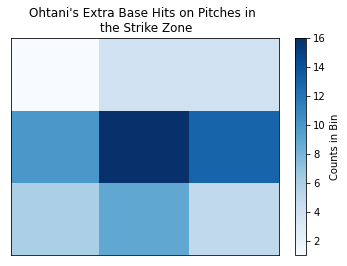

In [27]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
ohtani21_eb_zones = ohtani21_eb.copy().loc[ohtani21_eb.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Ohtani's extra base hits
ohtani21_eb_zones['zone_x'] = ohtani21_eb_zones.apply(assign_x_coord, axis=1)
ohtani21_eb_zones['zone_y'] = ohtani21_eb_zones.apply(assign_y_coord, axis=1)

# Plot Ohtani's extra base hit zone as a 2D histogram with a colorbar
plt.hist2d(x=ohtani21_eb_zones['zone_x'], y=ohtani21_eb_zones['zone_y'], bins = 3, cmap='Blues')
plt.title("Ohtani's Extra Base Hits on Pitches in \n the Strike Zone")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

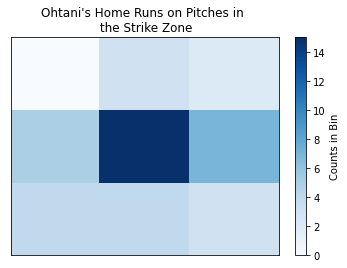

In [28]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
ohtani21_hr_zones = ohtani21_hr.copy().loc[ohtani21_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Ohtani's home runs
ohtani21_hr_zones['zone_x'] = ohtani21_hr_zones.apply(assign_x_coord, axis=1)
ohtani21_hr_zones['zone_y'] = ohtani21_hr_zones.apply(assign_y_coord, axis=1)

# Plot Ohtani's home run zone as a 2D histogram with a colorbar
plt.hist2d(x=ohtani21_hr_zones['zone_x'], y=ohtani21_hr_zones['zone_y'], bins = 3, cmap='Blues')
plt.title("Ohtani's Home Runs on Pitches in \n the Strike Zone")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

In [29]:
ohtani21_t = ohtani21_hits[ohtani21_hits.events=="triple"]

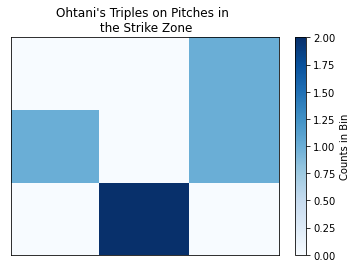

In [30]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
ohtani21_t_zones = ohtani21_t.copy().loc[ohtani21_t.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Ohtani's triples
ohtani21_t_zones['zone_x'] = ohtani21_t_zones.apply(assign_x_coord, axis=1)
ohtani21_t_zones['zone_y'] = ohtani21_t_zones.apply(assign_y_coord, axis=1)

# Plot Ohtani's triple zone as a 2D histogram with a colorbar
plt.hist2d(x=ohtani21_t_zones['zone_x'], y=ohtani21_t_zones['zone_y'], bins = 3, cmap='Blues')
plt.title("Ohtani's Triples on Pitches in \n the Strike Zone")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

In [31]:
ohtani21_d = ohtani21_hits[ohtani21_hits.events=="double"]

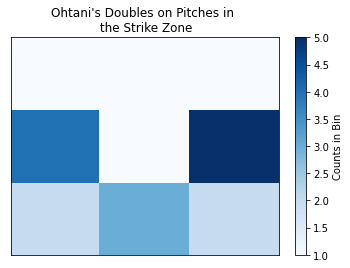

In [32]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
ohtani21_d_zones = ohtani21_d.copy().loc[ohtani21_d.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Ohtani's doubles
ohtani21_d_zones['zone_x'] = ohtani21_d_zones.apply(assign_x_coord, axis=1)
ohtani21_d_zones['zone_y'] = ohtani21_d_zones.apply(assign_y_coord, axis=1)

# Plot Ohtani's double zone as a 2D histogram with a colorbar
plt.hist2d(x=ohtani21_d_zones['zone_x'], y=ohtani21_d_zones['zone_y'], bins = 3, cmap='Blues')
plt.title("Ohtani's Doubles on Pitches in \n the Strike Zone")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

In [33]:
ohtani21_s = ohtani21_hits[ohtani21_hits.events=="single"]

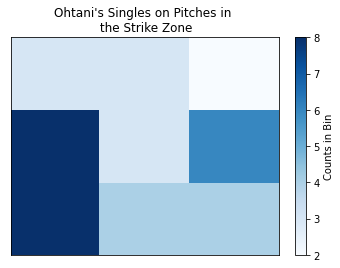

In [34]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
ohtani21_s_zones = ohtani21_s.copy().loc[ohtani21_s.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Ohtani's singles
ohtani21_s_zones['zone_x'] = ohtani21_s_zones.apply(assign_x_coord, axis=1)
ohtani21_s_zones['zone_y'] = ohtani21_s_zones.apply(assign_y_coord, axis=1)

# Plot Ohtani's single zone as a 2D histogram with a colorbar
plt.hist2d(x=ohtani21_s_zones['zone_x'], y=ohtani21_s_zones['zone_y'], bins = 3, cmap='Blues')
plt.title("Ohtani's Singles on Pitches in \n the Strike Zone")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

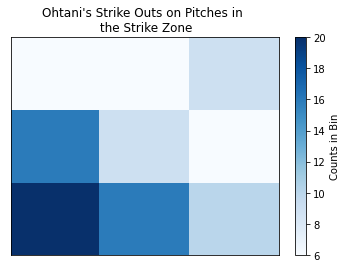

In [35]:
ohtani21_so_zones = ohtani21_so.copy().loc[ohtani21_so.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Ohtani's strike outs
ohtani21_so_zones['zone_x'] = ohtani21_so_zones.apply(assign_x_coord, axis=1)
ohtani21_so_zones['zone_y'] = ohtani21_so_zones.apply(assign_y_coord, axis=1)

# Plot Ohtani's strole out zone as a 2D histogram with a colorbar
plt.hist2d(x=ohtani21_so_zones['zone_x'], y=ohtani21_so_zones['zone_y'], bins = 3, cmap='Blues')
plt.title("Ohtani's Strike Outs on Pitches in \n the Strike Zone")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

In [36]:
ohtani21_strikes = ohtani21[(ohtani21.description == "called_strike") | (ohtani21.description == "swinging_strike")]

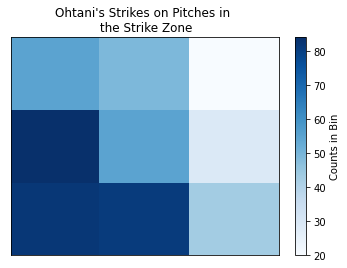

In [37]:
ohtani21_strikes_zones = ohtani21_strikes.copy().loc[ohtani21_strikes.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Ohtani's strikes
ohtani21_strikes_zones['zone_x'] = ohtani21_strikes_zones.apply(assign_x_coord, axis=1)
ohtani21_strikes_zones['zone_y'] = ohtani21_strikes_zones.apply(assign_y_coord, axis=1)

# Plot Ohtani's strikes' zone as a 2D histogram with a colorbar
plt.hist2d(x=ohtani21_strikes_zones['zone_x'], y=ohtani21_strikes_zones['zone_y'], bins = 3, cmap='Blues')
plt.title("Ohtani's Strikes on Pitches in \n the Strike Zone")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

In [38]:
ohtani21_fo = ohtani21[ohtani.events=="field_out"]

<ipython-input-38-42e7c8e897a2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ohtani21_fo = ohtani21[ohtani.events=="field_out"]


In [39]:
ohtani21_fo.groupby("events")["pitch_type"].value_counts(normalize=True)

events     pitch_type
field_out  FF            0.221053
           CH            0.210526
           SL            0.178947
           CU            0.121053
           SI            0.121053
           FC            0.089474
           KC            0.031579
           FS            0.026316
Name: pitch_type, dtype: float64

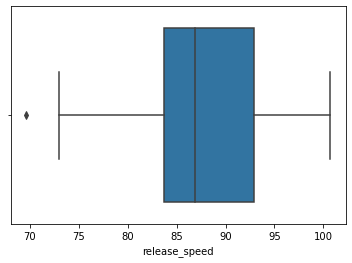

In [41]:
sns.boxplot(x="release_speed", data=ohtani21_fo)
plt.show()

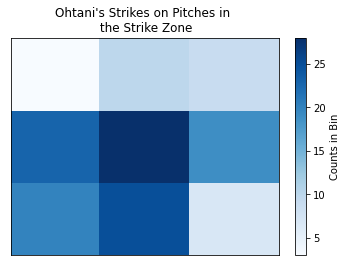

In [42]:
ohtani21_fo_zones = ohtani21_fo.copy().loc[ohtani21_fo.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Ohtani's field outs
ohtani21_fo_zones['zone_x'] = ohtani21_fo_zones.apply(assign_x_coord, axis=1)
ohtani21_fo_zones['zone_y'] = ohtani21_fo_zones.apply(assign_y_coord, axis=1)

# Plot Ohtani's field out zone as a 2D histogram with a colorbar
plt.hist2d(x=ohtani21_fo_zones['zone_x'], y=ohtani21_fo_zones['zone_y'], bins = 3, cmap='Blues')
plt.title("Ohtani's Strikes on Pitches in \n the Strike Zone")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

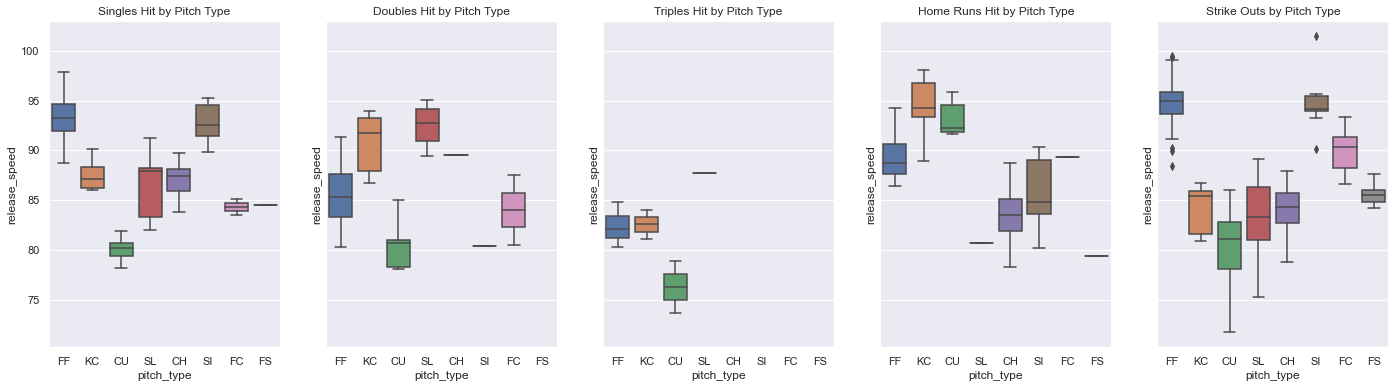

In [52]:
fig, axs = plt.subplots(ncols=5, sharex=True, sharey=True)
sns.set(rc={"figure.figsize":(30, 6)})
sns.boxplot(y="release_speed", x="pitch_type", data=ohtani21_s, ax=axs[0]).set_title("Singles Hit by Pitch Type")
sns.boxplot(y="release_speed", x="pitch_type", data=ohtani21_d, ax=axs[1]).set_title("Doubles Hit by Pitch Type")
sns.boxplot(y="release_speed", x="pitch_type", data=ohtani21_t, ax=axs[2]).set_title("Triples Hit by Pitch Type")
sns.boxplot(y="release_speed", x="pitch_type", data=ohtani21_hr, ax=axs[3]).set_title("Home Runs Hit by Pitch Type")
sns.boxplot(y="release_speed", x="pitch_type", data=ohtani21_so, ax=axs[4]).set_title("Strike Outs by Pitch Type")
plt.show()